In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge 
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score

In [2]:
df= pd.read_csv('ToyotaCorolla.csv')
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [4]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [5]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [6]:
df.duplicated().any()

True

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df['Fuel_Type'].unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [9]:
one_hot_encoder= OneHotEncoder()

In [10]:
df['Fuel_Type']=one_hot_encoder.fit_transform(df[['Fuel_Type']]).toarray()
df['Fuel_Type'].unique()

array([0., 1.])

In [11]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,0.0,90,0,2000,3,4,5,1165
1,13750,23,72937,0.0,90,0,2000,3,4,5,1165
2,13950,24,41711,0.0,90,0,2000,3,4,5,1165
3,14950,26,48000,0.0,90,0,2000,3,4,5,1165
4,13750,30,38500,0.0,90,0,2000,3,4,5,1170


In [12]:
Target=df[['Price']]
Features=df.drop('Price',axis=1)

In [13]:
Target

,Price
0,13500
1,13750
2,13950
3,14950
4,13750
...,...
1431,7500
1432,10845
1433,8500
1434,7250


In [14]:
Features

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,23,46986,0.0,90,0,2000,3,4,5,1165
1,23,72937,0.0,90,0,2000,3,4,5,1165
2,24,41711,0.0,90,0,2000,3,4,5,1165
3,26,48000,0.0,90,0,2000,3,4,5,1165
4,30,38500,0.0,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,0.0,86,0,1300,3,4,5,1025
1432,72,19000,0.0,86,0,1300,3,4,5,1015
1433,71,17016,0.0,86,0,1300,3,4,5,1015
1434,70,16916,0.0,86,0,1300,3,4,5,1015


### Model-1

In [15]:
x_train,x_test,y_train,y_test=train_test_split(Features,Target,train_size=0.75,random_state=15)

In [16]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1076, 10)
(1076, 1)
(359, 10)
(359, 1)


In [17]:
Lin_model=LinearRegression()

In [18]:
Lin_model.fit(x_train,y_train)

LinearRegression()

In [19]:
y_pred= Lin_model.predict(x_test)

In [20]:
y_pred

array([[ 9184.1345276 ],
       [ 7088.26323175],
       [ 7301.74831172],
       [ 9646.32259644],
       [17806.08578696],
       [11738.36748653],
       [12671.73241369],
       [10779.0949951 ],
       [ 8817.20230006],
       [ 9271.26049363],
       [11070.85783564],
       [14861.97064761],
       [ 7604.60248759],
       [10618.52698168],
       [18974.7318913 ],
       [12473.10508449],
       [ 8663.71758967],
       [ 7885.0850454 ],
       [11077.79159202],
       [19919.98241325],
       [ 8582.68087924],
       [17195.78373745],
       [17069.89653729],
       [ 8740.91979992],
       [13949.9244032 ],
       [ 6414.15379995],
       [ 9638.96222754],
       [16603.51606199],
       [10127.43388199],
       [ 8188.29473794],
       [10332.36762053],
       [ 9671.71084612],
       [ 9661.77569442],
       [14998.82259425],
       [ 7883.23867174],
       [13519.76573852],
       [12413.07410254],
       [ 7210.18434757],
       [14042.85426344],
       [ 8088.66832654],


In [21]:
Lin_model.score(x_test,y_test)

0.8920925719278852

In [22]:
Lin_model.coef_

array([[-1.22393943e+02, -1.96427521e-02, -9.84434000e+02,
         3.02101827e+01,  2.44314654e+02, -5.76075458e-02,
        -6.36768686e+00,  3.41060513e-13,  6.62546670e+02,
         1.75123372e+01]])

In [23]:
Lin_model.intercept_

array([-6130.83026786])

In [24]:
r2_score(y_test,y_pred)

0.8920925719278852

<Axes: xlabel='Price'>

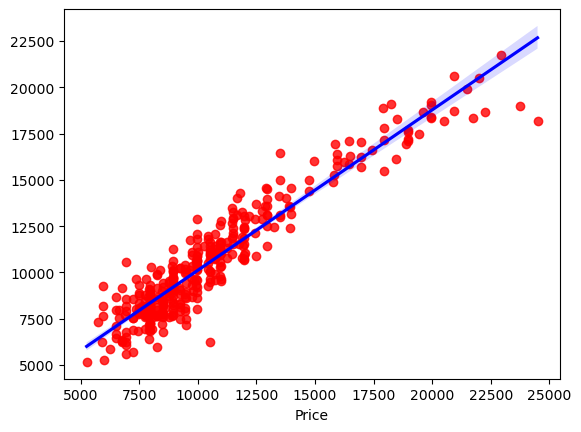

In [174]:
sns.regplot(data=df,x=y_test,y=y_pred,scatter_kws={'color':'Red'},line_kws={'color':'blue'})

### Model-2

In [25]:
x_train2,x_test2,y_train2,y_test2=train_test_split(Features,Target,train_size=0.80,random_state=15)

In [26]:
print(x_train2.shape)
print(y_train2.shape)
print(x_test2.shape)
print(y_test2.shape)

(1148, 10)
(1148, 1)
(287, 10)
(287, 1)


In [27]:
Lin_model.fit(x_train2,y_train2)

LinearRegression()

In [28]:
y_pred2= Lin_model.predict(x_test2)

In [29]:
y_pred2

array([[ 9202.17673403],
       [ 7070.74637647],
       [ 7267.07019425],
       [ 9645.44543708],
       [17836.63014889],
       [11743.91455183],
       [12671.98633408],
       [10773.93775398],
       [ 8813.11554034],
       [ 9255.95935034],
       [11049.80773566],
       [14880.49710393],
       [ 7618.83610858],
       [10621.31036277],
       [19014.60702883],
       [12476.35493078],
       [ 8641.4459119 ],
       [ 7847.6253472 ],
       [11052.43464337],
       [19884.47593721],
       [ 8616.06543387],
       [17218.43434494],
       [17108.9693571 ],
       [ 8717.34107957],
       [13958.16211978],
       [ 6380.93807535],
       [ 9656.25494813],
       [16626.731586  ],
       [10145.43627916],
       [ 8179.08484857],
       [10331.39590187],
       [ 9648.40881165],
       [ 9659.24377865],
       [15038.40117585],
       [ 7847.22133172],
       [13561.37928554],
       [12412.54525429],
       [ 7235.44890747],
       [14052.43970605],
       [ 8076.84514921],


In [32]:
Lin_model.score(x_test2,y_test2)

0.8903956667953776

In [33]:
Lin_model.coef_

array([[-1.22699840e+02, -1.99276234e-02, -9.40541574e+02,
         2.95215755e+01,  2.74179741e+02, -7.35342845e-02,
         2.08312471e+00, -2.27373675e-13,  6.85422635e+02,
         1.76843656e+01]])

In [34]:
Lin_model.intercept_

array([-6335.17080588])

In [35]:
r2_score(y_test2,y_pred2)

0.8903956667953776

<Axes: xlabel='Price'>

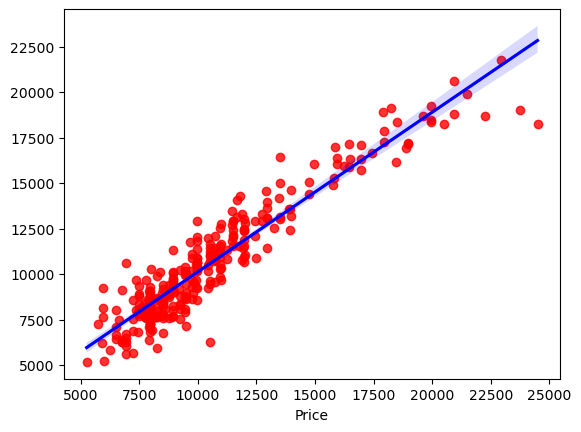

In [175]:
sns.regplot(data=df,x=y_test2,y=y_pred2,scatter_kws={'color':'Red'},line_kws={'color':'blue'})

### Model-3

In [36]:
x_train3,x_test3,y_train3,y_test3=train_test_split(Features,Target,train_size=0.70,random_state=15)

In [37]:
print(x_train3.shape)
print(y_train3.shape)
print(x_test3.shape)
print(y_test3.shape)

(1004, 10)
(1004, 1)
(431, 10)
(431, 1)


In [38]:
Lin_model.fit(x_train3,y_train3)

LinearRegression()

In [39]:
y_pred3= Lin_model.predict(x_test3)

In [40]:
y_pred3

array([[ 9336.37437369],
       [ 7376.76552866],
       [ 7324.27870342],
       [ 9528.93023157],
       [17689.51349938],
       [11656.97246298],
       [12760.3762517 ],
       [10847.78834942],
       [ 8703.96319821],
       [ 9438.07266869],
       [11065.82712737],
       [15100.41908428],
       [ 7729.3229644 ],
       [10170.60804828],
       [18988.30885106],
       [12504.89555732],
       [ 8569.80635184],
       [ 7937.90944158],
       [11139.31527308],
       [20036.61657036],
       [ 8699.1538253 ],
       [17314.86804763],
       [17036.62991633],
       [ 8627.0755349 ],
       [13947.6538775 ],
       [ 6290.35759283],
       [ 9827.49356884],
       [16864.78002346],
       [ 9999.64404732],
       [ 8140.26804889],
       [10316.051167  ],
       [ 9604.3170803 ],
       [ 9591.40211809],
       [14637.4600728 ],
       [ 7913.80000107],
       [13486.44842958],
       [12502.98874285],
       [ 7207.93496691],
       [14024.93737307],
       [ 8344.17857372],


In [41]:
Lin_model.score(x_test3,y_test3)

0.8033156672140691

In [42]:
Lin_model.coef_

array([[-1.24360722e+02, -1.63355518e-02, -1.27400798e+03,
         3.28178111e+01,  1.58695248e+02, -1.48242393e+00,
        -3.00906151e+01, -2.27373675e-13,  6.23172351e+02,
         1.99731597e+01]])

In [43]:
Lin_model.intercept_

array([-6610.2743865])

In [44]:
r2_score(y_test3,y_pred3)

0.8033156672140691

<Axes: xlabel='Price'>

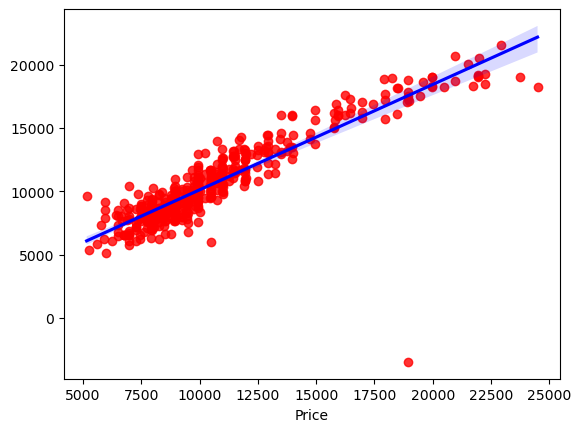

In [176]:
sns.regplot(data=df,x=y_test3,y=y_pred3,scatter_kws={'color':'Red'},line_kws={'color':'blue'})

 ## Applying Ridge and Lasso to the models

### For Model-1

In [63]:
lasso=Lasso()

In [64]:
var=range(1,1000)

In [114]:
params=dict(alpha=var)
params

{'alpha': range(1, 1000)}

In [78]:
Grid_search_L= GridSearchCV(lasso,params)

In [79]:
Grid_search_L.fit(x_train,y_train)

GridSearchCV(estimator=Lasso(alpha=999), param_grid={'alpha': range(1, 1000)})

In [80]:
Grid_search_L.best_params_

{'alpha': 999}

In [81]:
lasso=Lasso(alpha=999)

In [82]:
lasso.fit(x_train,y_train)

Lasso(alpha=999)

In [83]:
y_pred_L=lasso.predict(x_test)

In [84]:
y_pred_L

array([ 9350.37255988,  7152.94319751,  7242.52840258,  9753.77032565,
       17753.55473613, 11758.63254353, 12639.85439135, 10829.23755257,
        8947.72986509,  9177.25228868, 11002.37698394, 14869.55831796,
        7850.12641808, 10695.66487978, 18853.93824449, 12504.41767655,
        8675.85036161,  7846.14416093, 10942.74365386, 19546.15296525,
        8482.78725025, 16976.08739704, 16958.28111398,  8840.01261454,
       13818.71596794,  6306.24359723,  9754.09415631, 16531.18765375,
        9925.30168744,  8291.84668356, 10368.68150611,  9693.94567609,
        9739.22857133, 15108.44192578,  7866.54957195, 13233.64482187,
       12391.17865931,  7239.0375936 , 13924.19081345,  8153.39089817,
       11580.46759532, 12803.61685635,  8687.71462083,  8977.65872796,
        9361.36553644, 15607.14530777, 13295.18987415, 12835.39421008,
        7477.19069578,  8582.40038103,  7287.82783188, 16782.92682522,
        9449.35485644,  6395.30059456,  9716.88775565, 10255.35811959,
      

In [85]:
r2_score(y_test,y_pred)

0.8920925719278852

In [86]:
lasso.coef_

array([-1.16415373e+02, -2.22944083e-02, -0.00000000e+00,  2.57696119e+01,
        0.00000000e+00, -1.43158377e-02, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.79604208e+01])

In [87]:
lasso.intercept_

array([-3076.52771781])

In [88]:
ridge=Ridge()

In [113]:
params=dict(alpha=var)

In [103]:
Grid_search_R=GridSearchCV(ridge,params)

In [104]:
Grid_search_R.fit(x_train,y_train)

GridSearchCV(estimator=Ridge(alpha=25), param_grid={'alpha': range(1, 1000)})

In [105]:
Grid_search_R.best_params_

{'alpha': 25}

In [106]:
ridge=Ridge(alpha=25)

In [107]:
ridge.fit(x_train,y_train)

Ridge(alpha=25)

In [108]:
y_pred_R=ridge.predict(x_test)

In [109]:
y_pred_R

array([[ 9187.32555193],
       [ 7090.29270038],
       [ 7292.53261292],
       [ 9658.61847971],
       [17811.75802214],
       [11742.38219021],
       [12682.41690399],
       [10797.52387647],
       [ 8830.82698987],
       [ 9249.01030204],
       [11079.86451121],
       [14881.07932639],
       [ 7615.99660733],
       [10617.78225534],
       [18973.76910999],
       [12493.36783258],
       [ 8669.8661139 ],
       [ 7889.97959343],
       [11076.12807277],
       [19961.80959957],
       [ 8490.37750274],
       [17174.67559479],
       [17043.37055272],
       [ 8770.43554014],
       [13935.95574219],
       [ 6371.63542706],
       [ 9635.2503457 ],
       [16614.78503812],
       [10040.08272666],
       [ 8195.50428273],
       [10334.36847972],
       [ 9691.55304433],
       [ 9669.01935751],
       [15004.68215283],
       [ 7891.70136251],
       [13416.39794711],
       [12424.61566937],
       [ 7145.47935644],
       [14031.16670304],
       [ 8093.57342687],


In [110]:
r2_score(y_test,y_pred)

0.8920925719278852

In [111]:
ridge.coef_

array([[-1.21784819e+02, -2.01249125e-02, -3.67129342e+02,
         3.03559065e+01,  1.44449877e+02, -4.86702156e-02,
        -1.53830652e+01,  0.00000000e+00,  4.00238670e+02,
         1.75785885e+01]])

In [112]:
ridge.intercept_

array([-4879.93865219])

### For Model-2

In [116]:
Grid_search_L.fit(x_train2,y_train2)

GridSearchCV(estimator=Lasso(alpha=999), param_grid={'alpha': range(1, 1000)})

In [117]:
Grid_search_L.best_params_

{'alpha': 999}

In [118]:
lasso=Lasso(alpha=999)

In [121]:
lasso.fit(x_train2,y_train2)

Lasso(alpha=999)

In [122]:
y_pred_l2=lasso.predict(x_test2)

In [123]:
r2_score(y_test2,y_pred_l2)

0.8861996279432229

In [124]:
lasso.coef_

array([-1.16720003e+02, -2.24958422e-02, -0.00000000e+00,  2.54105229e+01,
        0.00000000e+00, -2.87168058e-02, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.82338216e+01])

In [125]:
lasso.intercept_

array([-3279.8723875])

In [126]:
Grid_search_R.fit(x_train2,y_train2)

GridSearchCV(estimator=Ridge(alpha=25), param_grid={'alpha': range(1, 1000)})

In [128]:
Grid_search_R.best_params_

{'alpha': 25}

In [129]:
ridge=Ridge(alpha=25)

In [131]:
ridge.fit(x_train2,y_train2)

Ridge(alpha=25)

In [134]:
y_pred_r2=ridge.predict(x_test2)

In [135]:
r2_score(y_test2,y_pred_r2)

0.8897490021346929

In [136]:
ridge.coef_

array([[-1.22133174e+02, -2.03441787e-02, -3.67176312e+02,
         2.97947991e+01,  1.70154821e+02, -6.51939696e-02,
        -8.43059627e+00,  0.00000000e+00,  4.21473414e+02,
         1.77687469e+01]])

In [137]:
ridge.intercept_

array([-5102.66601531])

### For Model-3

In [139]:
Grid_search_L.fit(x_train3,y_train3)

GridSearchCV(estimator=Lasso(alpha=999), param_grid={'alpha': range(1, 1000)})

In [140]:
Grid_search_L.best_params_

{'alpha': 2}

In [141]:
lasso=Lasso(alpha=2)

In [142]:
lasso.fit(x_train3,y_train3)

Lasso(alpha=2)

In [143]:
y_pred_l3=lasso.predict(x_test3)

In [144]:
r2_score(y_test3,y_pred_l3)

0.803959456689122

In [145]:
lasso.coef_

array([-1.24122570e+02, -1.65108105e-02, -1.12409065e+03,  3.27949954e+01,
        1.09881109e+02, -1.47302186e+00, -3.00934316e+01,  0.00000000e+00,
        5.69611493e+02,  1.99792986e+01])

In [146]:
lasso.intercept_

array([-6360.82301278])

In [147]:
Grid_search_R.fit(x_train3,y_train3)

GridSearchCV(estimator=Ridge(alpha=25), param_grid={'alpha': range(1, 1000)})

In [148]:
Grid_search_R.best_params_

{'alpha': 1}

In [168]:
ridge=Ridge(alpha=1)

In [169]:
ridge.fit(x_train3,y_train3)

Ridge(alpha=1)

In [170]:
y_pred_r3=ridge.predict(x_test3)

In [171]:
r2_score(y_test3,y_pred_r3)

0.8041357644152392

In [172]:
ridge.coef_

array([[-1.24273892e+02, -1.64246579e-02, -1.18425289e+03,
         3.27566089e+01,  1.52852141e+02, -1.47481688e+00,
        -3.04036438e+01,  0.00000000e+00,  6.10200950e+02,
         1.99617582e+01]])

In [173]:
ridge.intercept_

array([-6536.9660607])